In [17]:
using OperatorApproximation, LinearAlgebra

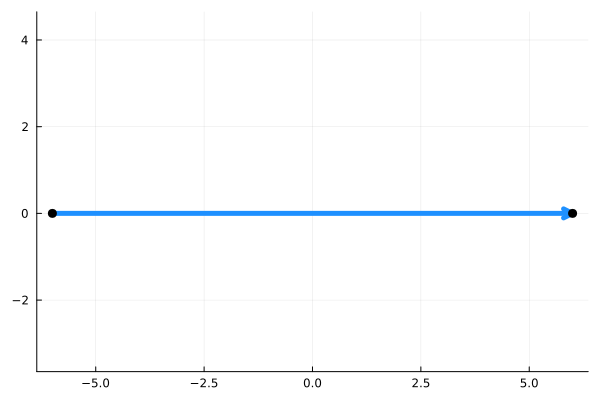

In [2]:
x,t = 0.0,0.0
r = k -> 0.5exp(-k^2)*exp(1im*(4t*k^2+2x*k))
G = [k->1-abs2(r(k)) k->-conj(r(k)); r k->1 ]
intervals = [-6 6]
jumps = [G]
c = [1 0]
rhp = RHP(intervals,jumps)
rhp_sol = RHSolver(rhp)
domainplot(rhp)

In [3]:
rhwellposed(rhp)

2-element Vector{Any}:
 (-6, Number[1.0 -1.1597614151217846e-16 + 0.0im; 1.1597614151217846e-16 + 0.0im 1])
 (6, Number[1.0 -1.1597614151217846e-16 + 0.0im; 1.1597614151217846e-16 + 0.0im 1])

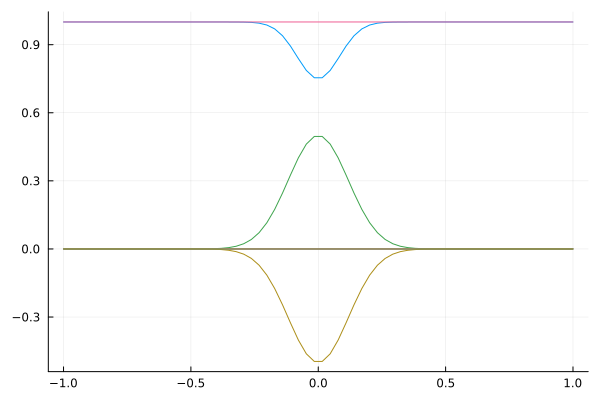

In [7]:
plt = rhplot(rhp);
plt[2]

In [8]:
u = rhp_sol([1 0],300)
1/pi*sum(u[2])

0.28901709868535375 + 1.987846675914698e-17im

# Larger times

0.0485712057543881 - 0.01995728931073724im

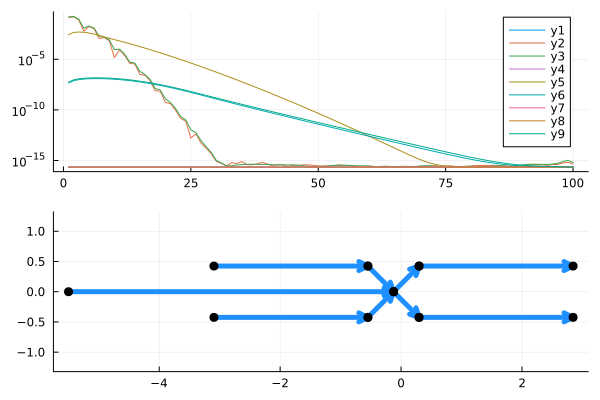

In [15]:
x,t = 4.0,8.0
θ = z -> 4t*z^2+2x*z
r = k -> 0.5*exp(-k^2)
r̄ = z -> conj(r(conj(z)))    

mkfun = y -> mvf2mof(y,2,2)
L = (z -> [1 0; r(z)/(1-r(z)r̄(z))*exp(im*θ(z)) 1]) |> mkfun
D = (z -> [1-r(z)r̄(z) 0; 0 1/(1-r(z)r̄(z))]) |> mkfun
U = (z -> [1 -r̄(z)/(1-r(z)r̄(z))*exp(-im*θ(z)); 0 1]) |> mkfun
P = (z -> [1 0; r(z)*exp(im*θ(z)) 1]) |> mkfun
M = (z -> [1 -r̄(z)*exp(-im*θ(z)); 0 1]) |> mkfun

z₀ = -x/(4t)
rad = .6

Γ₀(r,R) = [r*exp(im*pi/4) R*exp(im*pi/4);
    r*exp(-im*pi/4) R*exp(-im*pi/4);
    R*exp(3im*pi/4) r*exp(3im*pi/4);
    R*exp(-3im*pi/4) r*exp(-3im*pi/4)]

H₀(L) = [-L+im -1+im;
        -L-im -1-im; 
        1+im L+im;
        1-im L-im]/sqrt(2);

Γ = vcat(Γ₀(0,rad) .+ z₀, [-5.5 z₀], H₀(7)*rad .+ z₀)
J = [P,M,U,L,D,U,L,P,M] 
rhp = RHP(Γ,J);
rhp_solver = RHSolver(rhp)
c = [1 0]
u = rhp_solver(c,1800)
pc = coefplot(u[2])
 1/pi*sum(u[2]) |> display
pdom = domainplot(u[2])
plot(pc,pdom,layout = (2,1))

In [18]:
[ c[2] - I |> norm for c in  rhwellposed(rhp)]

10-element Vector{Float64}:
 0.0
 1.5253188012403227e-16
 0.0
 0.0
 0.0
 0.0
 3.9438973906741684e-40
 3.9438973906741684e-40
 1.7410851468494827e-39
 1.7410851468494827e-39

0.048571205751967 - 0.019957289318500552im

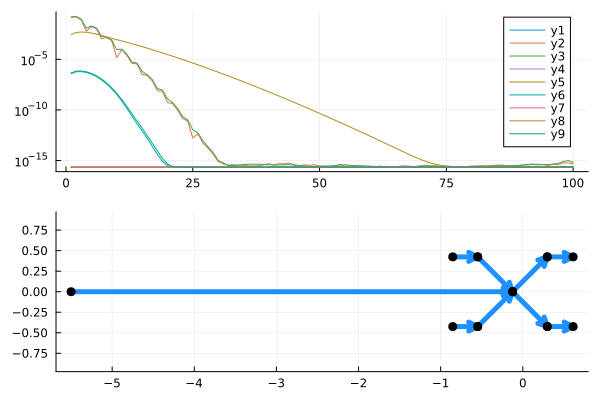

In [24]:
Lsamp = z -> 10*r(z)*exp(im*θ(z))
Dsamp = z -> 1-r(z)r̄(z)
Usamp = z -> 10*r̄(z)*exp(-im*θ(z))
Psamp = z -> 10*r(z)*exp(im*θ(z))
Msamp = z -> 10*r̄(z)*exp(-im*θ(z))
Jsamp = [Psamp,Msamp,Usamp,Lsamp,Dsamp,Usamp,Lsamp,Psamp,Msamp]

rhptrunc = adapt(rhp,Jsamp,1e-8);
rhptrunc_solver = RHSolver(rhptrunc);
u = rhptrunc_solver(c,1800)
pc = coefplot(u[2])
1/pi*sum(u[2]) |> display
pdom = domainplot(u[2])
plot(pc,pdom,layout = (2,1))

In [ ]:
x,t = 5.0,8.0
θ = z -> 4t*z^2+2x*z
r = k -> 0.5*exp(-k^2)
r̄ = z -> conj(r(conj(z)))    

mkfun = y -> mvf2mof(y,2,2)
L = (z -> [1 0; r(z)/(1-r(z)r̄(z))*exp(im*θ(z)) 1]) |> mkfun
D = (z -> [1-r(z)r̄(z) 0; 0 1/(1-r(z)r̄(z))]) |> mkfun
U = (z -> [1 -r̄(z)/(1-r(z)r̄(z))*exp(-im*θ(z)); 0 1]) |> mkfun
P = (z -> [1 0; r(z)*exp(im*θ(z)) 1]) |> mkfun
M = (z -> [1 -r̄(z)*exp(-im*θ(z)); 0 1]) |> mkfun

Lsamp = z -> 10*r(z)*exp(im*θ(z))
Dsamp = z -> 1-r(z)r̄(z)
Usamp = z -> 10*r̄(z)*exp(-im*θ(z))
Psamp = z -> 10*r(z)*exp(im*θ(z))
Msamp = z -> 10*r̄(z)*exp(-im*θ(z))

z₀ = -x/(4t)
rad = .6

Γ₀(r,R) = [r*exp(im*pi/4) R*exp(im*pi/4);
    r*exp(-im*pi/4) R*exp(-im*pi/4);
    R*exp(3im*pi/4) r*exp(3im*pi/4);
    R*exp(-3im*pi/4) r*exp(-3im*pi/4)]

H₀(L) = [-L+im -1+im;
        -L-im -1-im; 
        1+im L+im;
        1-im L-im]/sqrt(2);

Γ = vcat(Γ₀(0,rad) .+ z₀, [-5.5 z₀], H₀(7)*rad .+ z₀)
J = [P,M,U,L,D,U,L,P,M] 
Jsamp = [Psamp,Msamp,Usamp,Lsamp,Dsamp,Usamp,Lsamp,Psamp,Msamp]

rhp = RHP(Γ,J)
rhps = RHSolver(rhp);
v = rhps([0 1],1000)
rhpt = adapt(rhp,Jsamp,1e-10)
rhpts = RHSolver(rhpt);
u = rhpts([0 1],1000)
p1 = coefplot(u[1])
p2 = coefplot(v[1])
plot(p1,p2, layout = (2,1) )

domainplot(rhpt.Γ |> RHdomain)
domainplot(rhp.Γ |> RHdomain)